In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Mexico  = pd.read_csv('Mexico.csv')

In [3]:
# Verificamos información del dataframe
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26582 non-null  int64  
 1   last_scraped                                  26582 non-null  object 
 2   name                                          26582 non-null  object 
 3   host_id                                       26582 non-null  int64  
 4   host_name                                     26582 non-null  object 
 5   host_since                                    26582 non-null  object 
 6   host_response_time                            26582 non-null  object 
 7   host_is_superhost                             26582 non-null  object 
 8   host_identity_verified                        26582 non-null  object 
 9   neighbourhood                                 26582 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Mexico['review_scores_rating'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: review_scores_rating
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Mexico['review_scores_rating'].max()
Min = Mexico['review_scores_rating'].min()
Limites = [Min, Max]
Limites

[3.75, 5.0]

In [6]:
# Calculamos el rango R
R = Max - Min
R

1.25

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 26582

ni = 1 + 3.32 * np.log10(n)
ni

15.689631010177528

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

0.07967045236367584

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [9]:
# Categorización de variables
intervalos = np.linspace (3.75, 5.0, 16)
intervalos

array([3.75      , 3.83333333, 3.91666667, 4.        , 4.08333333,
       4.16666667, 4.25      , 4.33333333, 4.41666667, 4.5       ,
       4.58333333, 4.66666667, 4.75      , 4.83333333, 4.91666667,
       5.        ])

In [10]:
# Creamos las categorías
categorias = [
    "Muy insatisfactorio",
    "Insatisfactorio",
    "Bajo",
    "Poco aceptable",
    "Aceptable",
    "Satisfactorio",
    "Bueno",
    "Muy bueno",
    "Excelente",
    "Impresionante",
    "Maravilloso",
    "Fantástico",
    "Increíble",
    "Excepcional",
    "Perfecto"
]


In [11]:
# Creamos las ctegorias en la columna numerica
Mexico['review_scores_rating'] = pd.cut ( x = Mexico ['review_scores_rating'], bins = intervalos, labels = categorias )
Mexico['review_scores_rating']

0          Excepcional
1        Impresionante
2          Excepcional
3          Excepcional
4          Excepcional
             ...      
26577      Excepcional
26578      Excepcional
26579      Excepcional
26580      Excepcional
26581      Excepcional
Name: review_scores_rating, Length: 26582, dtype: category
Categories (15, object): ['Muy insatisfactorio' < 'Insatisfactorio' < 'Bajo' < 'Poco aceptable' ... 'Fantástico' < 'Increíble' < 'Excepcional' < 'Perfecto']

In [12]:
table1 = freq_tbl(Mexico['review_scores_rating'])
table1

,review_scores_rating,frequency,percentage,cumulative_perc
0,Perfecto,7802,0.293507,0.293783
1,Excepcional,7729,0.290761,0.584818
2,Increíble,3816,0.143556,0.728508
3,Fantástico,2913,0.109585,0.838197
4,Maravilloso,1211,0.045557,0.883797
5,Excelente,866,0.032578,0.916406
6,Impresionante,785,0.029531,0.945965
7,Bajo,473,0.017794,0.963776
8,Bueno,311,0.011700,0.975487
9,Muy bueno,263,0.009894,0.985390


In [13]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,review_scores_rating,frequency
0,Perfecto,7802
1,Excepcional,7729
2,Increíble,3816
3,Fantástico,2913
4,Maravilloso,1211
5,Excelente,866
6,Impresionante,785
7,Bajo,473
8,Bueno,311
9,Muy bueno,263


In [14]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('review_scores_rating')
Filtro_index

,frequency
review_scores_rating,
Perfecto,7802
Excepcional,7729
Increíble,3816
Fantástico,2913
Maravilloso,1211
Excelente,866
Impresionante,785
Bajo,473
Bueno,311


Text(0, 0.5, 'Frecuencia')

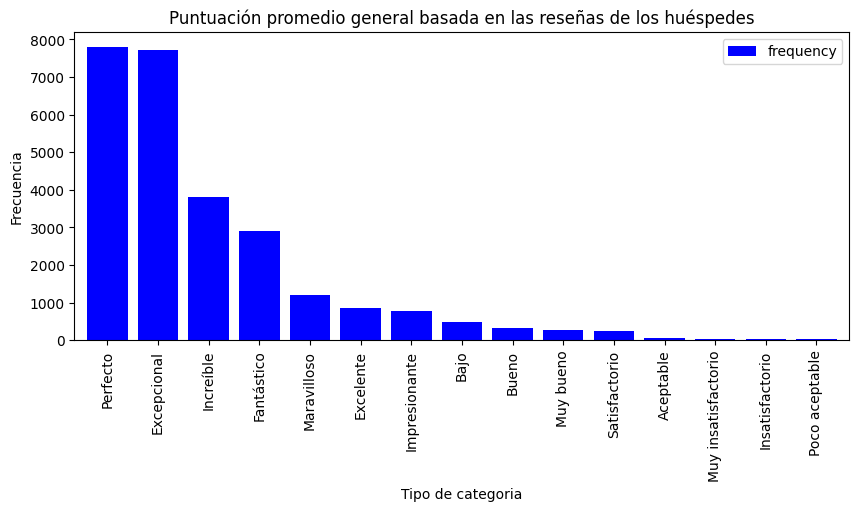

In [15]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Puntuación promedio general basada en las reseñas de los huéspedes')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')